In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#cargar archivo desde seaborn 
df=pd.read_csv('Malta_limpio.csv')
#eliminamos la columna unnamed 
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/50188,Cosy fully renovated farmhouse Gozo,Xewkija is a small village found on the island...,"Felix the butcher , the bakery and the mini ma...",https://a0.muscache.com/pictures/39216710/b3fa...,Alexandra,2015-09-29,Desconocido,-%,f,...,4.83,4.95,4.95,4.62,4.79,1.0,1.0,0.0,0.0,1.32
1,https://www.airbnb.com/rooms/53723,Studio apartment Apt.3,A tastefully converted open plan apartment who...,"Located right in the heart of Valletta, a worl...",https://a0.muscache.com/pictures/1eeb37c2-16f6...,Michael,2010-10-02,within a few hours,100%,t,...,4.79,4.95,4.97,4.97,4.69,4.0,4.0,0.0,0.0,1.09
2,https://www.airbnb.com/rooms/102120,4 Bedroom Family-run House with Pool,Air conditioning in 3 bedrooms (on a pay-per-u...,The village square is just a few minutes away....,https://a0.muscache.com/pictures/prohost-api/H...,Michael,2011-04-25,within an hour,94%,t,...,4.59,4.89,4.93,4.52,4.80,7.0,7.0,0.0,0.0,0.31
3,https://www.airbnb.com/rooms/109123,Penthouse Apartment.,Our place is located in a small town called Na...,I can tell where the best places are for break...,https://a0.muscache.com/pictures/724159/6277e4...,Lino And Rose,2011-05-05,within an hour,100%,t,...,4.86,4.96,4.94,4.82,4.90,3.0,3.0,0.0,0.0,0.79
4,https://www.airbnb.com/rooms/113998,Residence Rouge™ 1 Floriana Valletta.,Hi and welcome to Residence Rouge.<br />Our 20...,No se proporcionan detalles,https://a0.muscache.com/pictures/744058/a7f0aa...,Alan,2011-05-11,a few days or more,13%,f,...,4.78,4.84,4.91,4.80,4.69,7.0,7.0,0.0,0.0,1.25


In [3]:
f1=df.iloc[ :  , [8,9,10,12,13,21,27,28,31,42] ]
f1

,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,-%,f,t,Entire villa,Entire home/apt,f,6.0,2.5,160.0,4.83
1,100%,t,t,Entire rental unit,Entire home/apt,f,2.0,1.0,100.0,4.79
2,94%,t,t,Entire home,Entire home/apt,f,8.0,1.4,83.0,4.59
3,100%,t,t,Entire rental unit,Entire home/apt,f,4.0,1.0,55.0,4.86
4,13%,f,t,Entire rental unit,Entire home/apt,f,2.0,1.0,49.0,4.78
...,...,...,...,...,...,...,...,...,...,...
12604,100%,f,t,Entire rental unit,Entire home/apt,t,5.0,2.0,157.0,5.00
12605,94%,t,t,Private room in home,Private room,f,2.0,1.0,50.0,5.00
12606,100%,f,t,Entire rental unit,Entire home/apt,t,4.0,1.0,85.0,5.00
12607,100%,t,t,Entire rental unit,Entire home/apt,t,6.0,2.0,128.0,5.00


In [4]:
#convertimos string a tipos numéricos
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
f1['property_type'] = encoder.fit_transform(f1['property_type'])

f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

C:\Users\valer\AppData\Local\Temp\ipykernel_35784\3436113170.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\valer\AppData\Local\Temp\ipykernel_35784\3436113170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\valer\AppData\Local\Temp\ipykernel_35784\3436113170.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remo

In [5]:
#f2 = Entire home/apt
f2= f1[(f1["room_type"] == 2)]

In [6]:
f2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3239 entries, 5 to 12605
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         3239 non-null   float64
 1   host_is_superhost          3239 non-null   int64  
 2   host_identity_verified     3239 non-null   int64  
 3   property_type              3239 non-null   int64  
 4   room_type                  3239 non-null   int64  
 5   instant_bookable           3239 non-null   int64  
 6   accommodates               3239 non-null   float64
 7   bathrooms                  3239 non-null   float64
 8   price                      3239 non-null   float64
 9   review_scores_cleanliness  3239 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 278.4 KB


<Axes: xlabel='room_type', ylabel='price'>

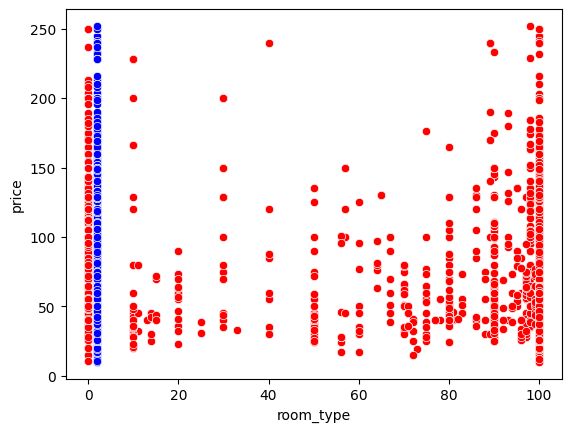

In [7]:
#imprimimos el scatter plot entre la variable dependiente total e independiente (a)
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_response_rate', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

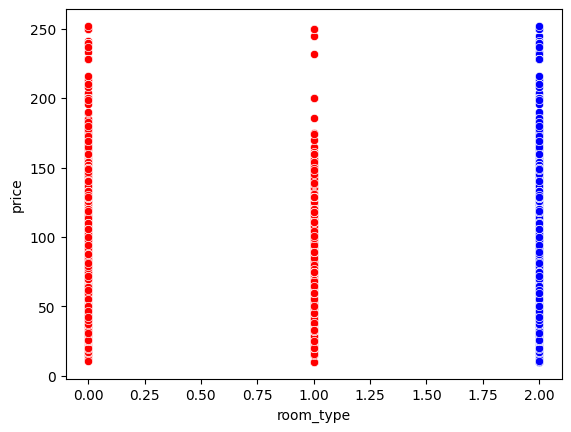

In [8]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_is_superhost', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

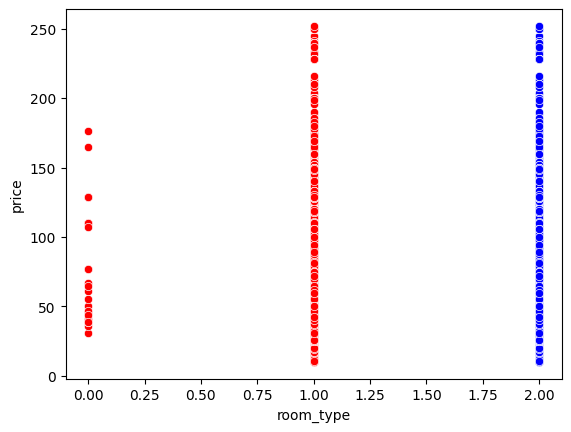

In [9]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_identity_verified', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

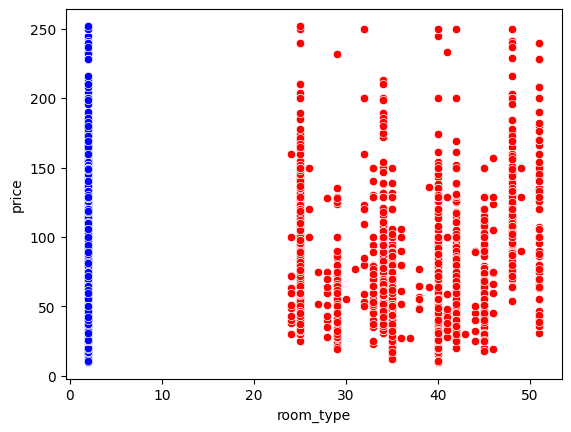

In [10]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='property_type', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

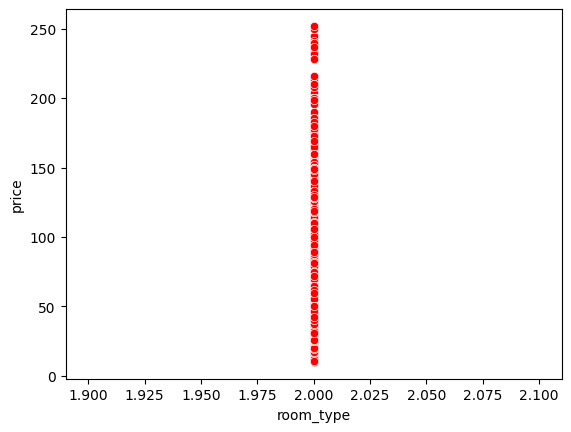

In [11]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='room_type', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

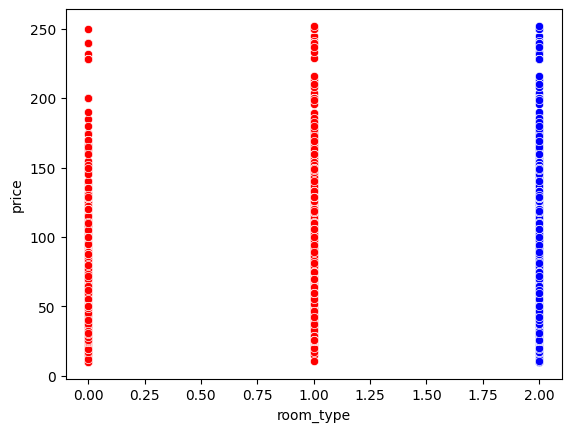

In [12]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='instant_bookable', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

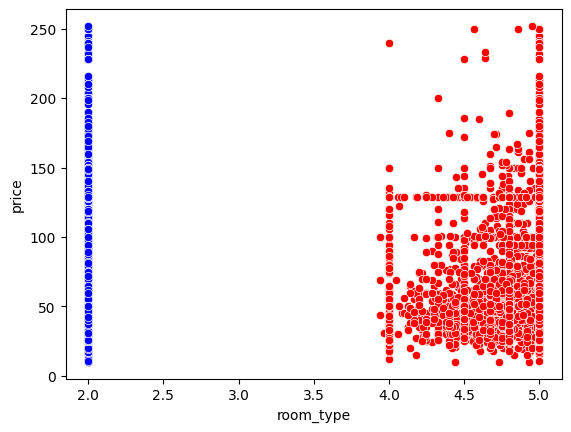

In [13]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='review_scores_cleanliness', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='accommodates'>

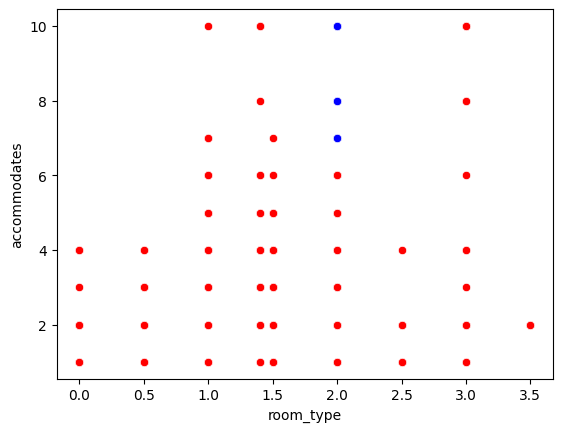

In [14]:
from turtle import color 
sns.scatterplot(x='room_type', y='accommodates', color='blue', data=f2)
sns.scatterplot(x='bathrooms', y='accommodates', color='red', data=f2)

In [15]:
#declaración de las variables independientes que se van a comparar con el precio 
Var_Indep= f2[['host_response_rate']]
Var_Indep2=f2[['host_is_superhost']]
Var_Indep3=f2[['room_type']]
Var_Indep4=f2[['host_identity_verified']]
Var_Indep5= f2[['property_type']]
Var_Indep6= f2[['instant_bookable']]
Var_Indep7= f2[['review_scores_cleanliness']]
#declaración de variable independiente para accommodates 
Var_Indep8= f2[['bathrooms']]

In [16]:
#variables independientes para la regresión lineal
Var_Dep= f2['price']
Var_Dep2= f2['accommodates']

In [17]:
#se define model como función de regresión lineal 
from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model2=LinearRegression()
model3=LinearRegression()
model4=LinearRegression()
model5=LinearRegression()
model6=LinearRegression()
model7=LinearRegression()
model8=LinearRegression()

In [18]:
#verficamos la función relacionada al modelo 
type(model)
type(model2)
type(model3)
type(model4)
type(model5)
type(model6)
type(model7)
type(model8)

sklearn.linear_model._base.LinearRegression

In [19]:
#ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep, y=Var_Dep)
model2.fit(X=Var_Indep2, y=Var_Dep)
model3.fit(X=Var_Indep3, y=Var_Dep)
model4.fit(X=Var_Indep4, y=Var_Dep)
model5.fit(X=Var_Indep5, y=Var_Dep)
model6.fit(X=Var_Indep6, y=Var_Dep)
model7.fit(X=Var_Indep7, y=Var_Dep)
model8.fit(X=Var_Indep8, y=Var_Dep2)

LinearRegression()

In [20]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.241299]),
 'rank_': 1,
 'singular_': array([2040.19919543]),
 'intercept_': np.float64(90.79578953280935)}

In [21]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-2.4892362]),
 'rank_': 1,
 'singular_': array([25.90272014]),
 'intercept_': np.float64(71.84803493449782)}

In [22]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(71.11870947823402)}

In [23]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-12.00457636]),
 'rank_': 1,
 'singular_': array([5.07851293]),
 'intercept_': np.float64(83.02692307692317)}

In [24]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.44713334]),
 'rank_': 1,
 'singular_': array([387.23987634]),
 'intercept_': np.float64(54.406220821078065)}

In [25]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([15.69509599]),
 'rank_': 1,
 'singular_': array([28.26269397]),
 'intercept_': np.float64(64.18456858407077)}

In [26]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([29.31351398]),
 'rank_': 1,
 'singular_': array([14.91134972]),
 'intercept_': np.float64(-69.87567269566873)}

In [27]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.41150426]),
 'rank_': 1,
 'singular_': array([21.10043859]),
 'intercept_': np.float64(1.7060721943768553)}

**Prediccion de valores**

In [28]:
#predecimos valores
y_pred= model.predict(X=f2[['host_response_rate']])
y_pred

array([66.66589002, 66.66589002, 66.66589002, ..., 66.66589002,
       66.66589002, 68.11368399], shape=(3239,))

In [29]:
#predecimos valores
y_pred2= model2.predict(X=f2[['host_is_superhost']])
y_pred2

array([69.35879874, 69.35879874, 71.84803493, ..., 71.84803493,
       71.84803493, 69.35879874], shape=(3239,))

In [30]:
#predecimos valores
y_pred3= model3.predict(X=f2[['room_type']])
y_pred3

array([71.11870948, 71.11870948, 71.11870948, ..., 71.11870948,
       71.11870948, 71.11870948], shape=(3239,))

In [31]:
#predecimos valores
y_pred4= model4.predict(X=f2[['host_identity_verified']])
y_pred4

array([71.02234672, 71.02234672, 71.02234672, ..., 71.02234672,
       71.02234672, 71.02234672], shape=(3239,))

In [32]:
#predecimos valores
y_pred5= model5.predict(X=f2[['property_type']])
y_pred5

array([67.3730877 , 72.29155445, 72.29155445, ..., 69.60875441,
       69.60875441, 70.05588775], shape=(3239,))

In [33]:
#predecimos valores
y_pred6= model6.predict(X=f2[['instant_bookable']])
y_pred6

array([64.18456858, 79.87966457, 64.18456858, ..., 79.87966457,
       79.87966457, 64.18456858], shape=(3239,))

In [34]:
y_pred7= model7.predict(X=f2[['review_scores_cleanliness']])
y_pred7

array([69.65665385, 70.53605927, 69.94978899, ..., 76.6918972 ,
       76.6918972 , 76.6918972 ], shape=(3239,))

In [35]:
y_pred8= model8.predict(X=f2[['bathrooms']])
y_pred8

array([2.11757646, 2.11757646, 2.11757646, ..., 2.11757646, 2.11757646,
       2.11757646], shape=(3239,))

In [36]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(0, 'Prediccion_host_response_rate', y_pred)
f2

,Prediccion_host_response_rate,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
5,66.665890,100.0,1,1,29,2,0,2.0,1.0,49.0,4.76
9,66.665890,100.0,1,1,40,2,1,3.0,1.0,128.9,4.79
10,66.665890,100.0,0,1,40,2,0,1.0,1.0,40.0,4.77
11,90.795790,0.0,0,1,40,2,0,5.0,1.5,40.0,4.78
15,66.665890,100.0,0,1,40,2,0,1.0,1.0,40.0,4.55
...,...,...,...,...,...,...,...,...,...,...,...
12580,66.665890,100.0,0,1,35,2,1,2.0,1.5,44.0,5.00
12585,90.795790,0.0,0,1,40,2,0,2.0,0.5,40.0,5.00
12590,66.665890,100.0,0,1,34,2,1,2.0,1.0,47.0,5.00
12591,66.665890,100.0,0,1,34,2,1,2.0,1.0,42.0,5.00


In [37]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(1, 'Prediccion_host_is_superhost', y_pred2)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
5,66.665890,69.358799,100.0,1,1,29,2,0,2.0,1.0,49.0,4.76
9,66.665890,69.358799,100.0,1,1,40,2,1,3.0,1.0,128.9,4.79
10,66.665890,71.848035,100.0,0,1,40,2,0,1.0,1.0,40.0,4.77
11,90.795790,71.848035,0.0,0,1,40,2,0,5.0,1.5,40.0,4.78
15,66.665890,71.848035,100.0,0,1,40,2,0,1.0,1.0,40.0,4.55
...,...,...,...,...,...,...,...,...,...,...,...,...
12580,66.665890,71.848035,100.0,0,1,35,2,1,2.0,1.5,44.0,5.00
12585,90.795790,71.848035,0.0,0,1,40,2,0,2.0,0.5,40.0,5.00
12590,66.665890,71.848035,100.0,0,1,34,2,1,2.0,1.0,47.0,5.00
12591,66.665890,71.848035,100.0,0,1,34,2,1,2.0,1.0,42.0,5.00


In [38]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(2, 'Prediccion_room_type', y_pred3)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
5,66.665890,69.358799,71.118709,100.0,1,1,29,2,0,2.0,1.0,49.0,4.76
9,66.665890,69.358799,71.118709,100.0,1,1,40,2,1,3.0,1.0,128.9,4.79
10,66.665890,71.848035,71.118709,100.0,0,1,40,2,0,1.0,1.0,40.0,4.77
11,90.795790,71.848035,71.118709,0.0,0,1,40,2,0,5.0,1.5,40.0,4.78
15,66.665890,71.848035,71.118709,100.0,0,1,40,2,0,1.0,1.0,40.0,4.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12580,66.665890,71.848035,71.118709,100.0,0,1,35,2,1,2.0,1.5,44.0,5.00
12585,90.795790,71.848035,71.118709,0.0,0,1,40,2,0,2.0,0.5,40.0,5.00
12590,66.665890,71.848035,71.118709,100.0,0,1,34,2,1,2.0,1.0,47.0,5.00
12591,66.665890,71.848035,71.118709,100.0,0,1,34,2,1,2.0,1.0,42.0,5.00


In [39]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(3, 'Prediccion_host_identity_verified', y_pred4)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
5,66.665890,69.358799,71.118709,71.022347,100.0,1,1,29,2,0,2.0,1.0,49.0,4.76
9,66.665890,69.358799,71.118709,71.022347,100.0,1,1,40,2,1,3.0,1.0,128.9,4.79
10,66.665890,71.848035,71.118709,71.022347,100.0,0,1,40,2,0,1.0,1.0,40.0,4.77
11,90.795790,71.848035,71.118709,71.022347,0.0,0,1,40,2,0,5.0,1.5,40.0,4.78
15,66.665890,71.848035,71.118709,71.022347,100.0,0,1,40,2,0,1.0,1.0,40.0,4.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12580,66.665890,71.848035,71.118709,71.022347,100.0,0,1,35,2,1,2.0,1.5,44.0,5.00
12585,90.795790,71.848035,71.118709,71.022347,0.0,0,1,40,2,0,2.0,0.5,40.0,5.00
12590,66.665890,71.848035,71.118709,71.022347,100.0,0,1,34,2,1,2.0,1.0,47.0,5.00
12591,66.665890,71.848035,71.118709,71.022347,100.0,0,1,34,2,1,2.0,1.0,42.0,5.00


In [40]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(4, 'Prediccion_property_type', y_pred5)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
5,66.665890,69.358799,71.118709,71.022347,67.373088,100.0,1,1,29,2,0,2.0,1.0,49.0,4.76
9,66.665890,69.358799,71.118709,71.022347,72.291554,100.0,1,1,40,2,1,3.0,1.0,128.9,4.79
10,66.665890,71.848035,71.118709,71.022347,72.291554,100.0,0,1,40,2,0,1.0,1.0,40.0,4.77
11,90.795790,71.848035,71.118709,71.022347,72.291554,0.0,0,1,40,2,0,5.0,1.5,40.0,4.78
15,66.665890,71.848035,71.118709,71.022347,72.291554,100.0,0,1,40,2,0,1.0,1.0,40.0,4.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12580,66.665890,71.848035,71.118709,71.022347,70.055888,100.0,0,1,35,2,1,2.0,1.5,44.0,5.00
12585,90.795790,71.848035,71.118709,71.022347,72.291554,0.0,0,1,40,2,0,2.0,0.5,40.0,5.00
12590,66.665890,71.848035,71.118709,71.022347,69.608754,100.0,0,1,34,2,1,2.0,1.0,47.0,5.00
12591,66.665890,71.848035,71.118709,71.022347,69.608754,100.0,0,1,34,2,1,2.0,1.0,42.0,5.00


In [41]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(5, 'Prediccion_instant_bookable', y_pred6)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
5,66.665890,69.358799,71.118709,71.022347,67.373088,64.184569,100.0,1,1,29,2,0,2.0,1.0,49.0,4.76
9,66.665890,69.358799,71.118709,71.022347,72.291554,79.879665,100.0,1,1,40,2,1,3.0,1.0,128.9,4.79
10,66.665890,71.848035,71.118709,71.022347,72.291554,64.184569,100.0,0,1,40,2,0,1.0,1.0,40.0,4.77
11,90.795790,71.848035,71.118709,71.022347,72.291554,64.184569,0.0,0,1,40,2,0,5.0,1.5,40.0,4.78
15,66.665890,71.848035,71.118709,71.022347,72.291554,64.184569,100.0,0,1,40,2,0,1.0,1.0,40.0,4.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12580,66.665890,71.848035,71.118709,71.022347,70.055888,79.879665,100.0,0,1,35,2,1,2.0,1.5,44.0,5.00
12585,90.795790,71.848035,71.118709,71.022347,72.291554,64.184569,0.0,0,1,40,2,0,2.0,0.5,40.0,5.00
12590,66.665890,71.848035,71.118709,71.022347,69.608754,79.879665,100.0,0,1,34,2,1,2.0,1.0,47.0,5.00
12591,66.665890,71.848035,71.118709,71.022347,69.608754,79.879665,100.0,0,1,34,2,1,2.0,1.0,42.0,5.00


In [42]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(6, 'Prediccion_review_scores_cleanliness', y_pred7)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
5,66.665890,69.358799,71.118709,71.022347,67.373088,64.184569,69.656654,100.0,1,1,29,2,0,2.0,1.0,49.0,4.76
9,66.665890,69.358799,71.118709,71.022347,72.291554,79.879665,70.536059,100.0,1,1,40,2,1,3.0,1.0,128.9,4.79
10,66.665890,71.848035,71.118709,71.022347,72.291554,64.184569,69.949789,100.0,0,1,40,2,0,1.0,1.0,40.0,4.77
11,90.795790,71.848035,71.118709,71.022347,72.291554,64.184569,70.242924,0.0,0,1,40,2,0,5.0,1.5,40.0,4.78
15,66.665890,71.848035,71.118709,71.022347,72.291554,64.184569,63.500816,100.0,0,1,40,2,0,1.0,1.0,40.0,4.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12580,66.665890,71.848035,71.118709,71.022347,70.055888,79.879665,76.691897,100.0,0,1,35,2,1,2.0,1.5,44.0,5.00
12585,90.795790,71.848035,71.118709,71.022347,72.291554,64.184569,76.691897,0.0,0,1,40,2,0,2.0,0.5,40.0,5.00
12590,66.665890,71.848035,71.118709,71.022347,69.608754,79.879665,76.691897,100.0,0,1,34,2,1,2.0,1.0,47.0,5.00
12591,66.665890,71.848035,71.118709,71.022347,69.608754,79.879665,76.691897,100.0,0,1,34,2,1,2.0,1.0,42.0,5.00


In [43]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(7, 'Prediccion_bathrooms', y_pred8)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
5,66.665890,69.358799,71.118709,71.022347,67.373088,64.184569,69.656654,2.117576,100.0,1,1,29,2,0,2.0,1.0,49.0,4.76
9,66.665890,69.358799,71.118709,71.022347,72.291554,79.879665,70.536059,2.117576,100.0,1,1,40,2,1,3.0,1.0,128.9,4.79
10,66.665890,71.848035,71.118709,71.022347,72.291554,64.184569,69.949789,2.117576,100.0,0,1,40,2,0,1.0,1.0,40.0,4.77
11,90.795790,71.848035,71.118709,71.022347,72.291554,64.184569,70.242924,2.323329,0.0,0,1,40,2,0,5.0,1.5,40.0,4.78
15,66.665890,71.848035,71.118709,71.022347,72.291554,64.184569,63.500816,2.117576,100.0,0,1,40,2,0,1.0,1.0,40.0,4.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12580,66.665890,71.848035,71.118709,71.022347,70.055888,79.879665,76.691897,2.323329,100.0,0,1,35,2,1,2.0,1.5,44.0,5.00
12585,90.795790,71.848035,71.118709,71.022347,72.291554,64.184569,76.691897,1.911824,0.0,0,1,40,2,0,2.0,0.5,40.0,5.00
12590,66.665890,71.848035,71.118709,71.022347,69.608754,79.879665,76.691897,2.117576,100.0,0,1,34,2,1,2.0,1.0,47.0,5.00
12591,66.665890,71.848035,71.118709,71.022347,69.608754,79.879665,76.691897,2.117576,100.0,0,1,34,2,1,2.0,1.0,42.0,5.00


**Graficas de comparacion**

<Axes: xlabel='host_response_rate', ylabel='price'>

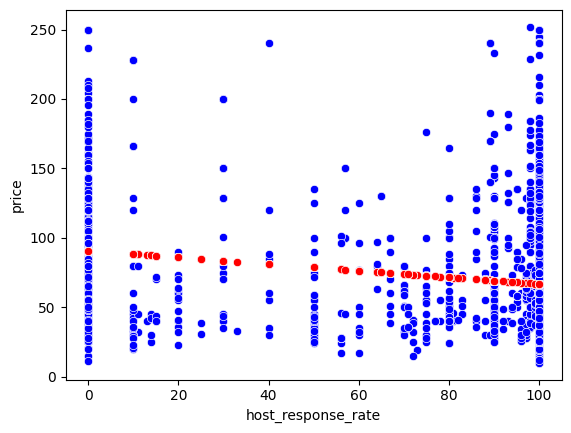

In [44]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='host_response_rate', y='price', color='blue', data=f2)
sns.scatterplot(x='host_response_rate', y='Prediccion_host_response_rate', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='host_is_superhost', ylabel='price'>

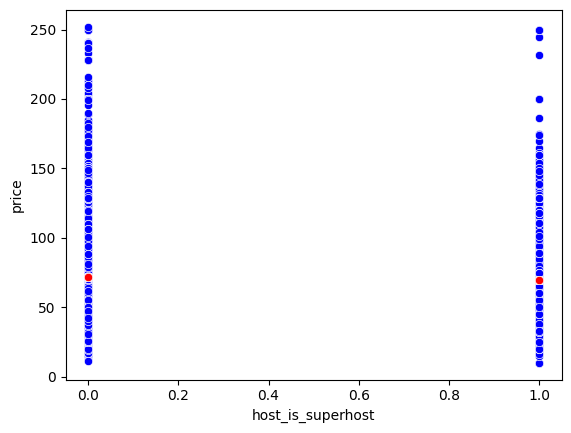

In [45]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='host_is_superhost', y='price', color='blue', data=f2)
sns.scatterplot(x='host_is_superhost', y='Prediccion_host_is_superhost', color='red', data=f2)
#sns.lineplot(x='host_is_superhost', y='Predicciones2', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

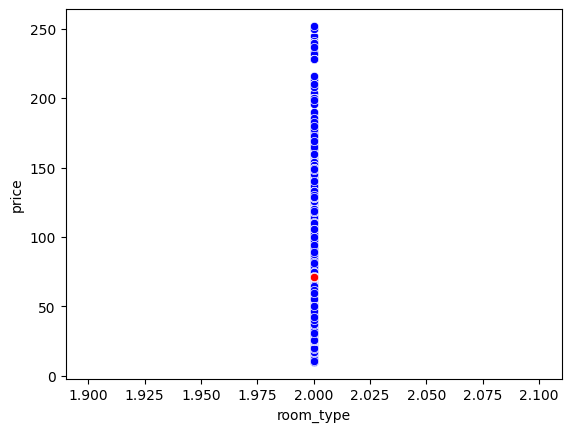

In [46]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='room_type', y='Prediccion_room_type', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='host_identity_verified', ylabel='price'>

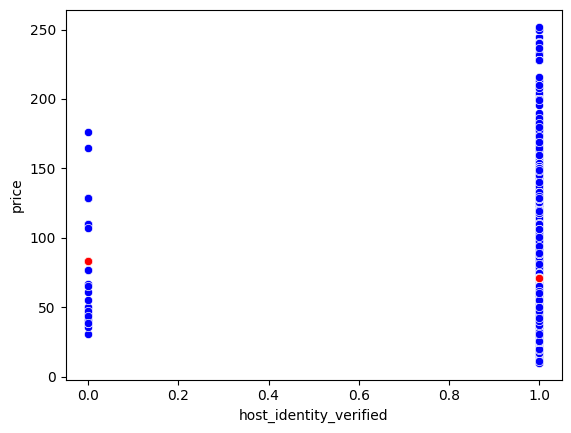

In [47]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='host_identity_verified', y='price', color='blue', data=f2)
sns.scatterplot(x='host_identity_verified', y='Prediccion_host_identity_verified', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='property_type', ylabel='price'>

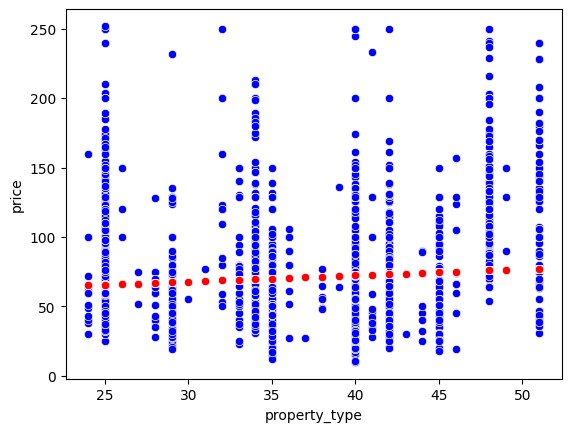

In [48]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='property_type', y='price', color='blue', data=f2)
sns.scatterplot(x='property_type', y='Prediccion_property_type', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='instant_bookable', ylabel='price'>

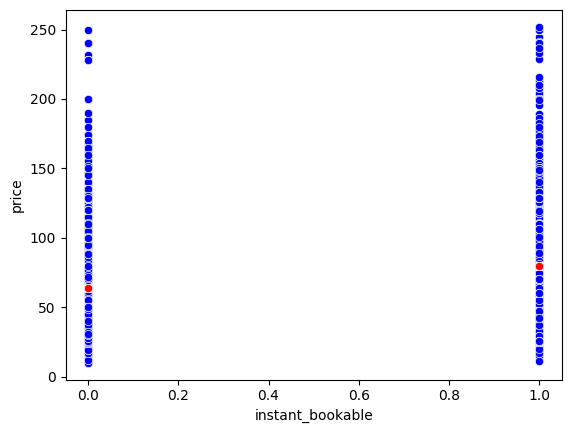

In [49]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='instant_bookable', y='price', color='blue', data=f2)
sns.scatterplot(x='instant_bookable', y='Prediccion_instant_bookable', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: title={'center': 'Precio en relación a calificación de limpieza predecido'}, xlabel='review_scores_cleanliness', ylabel='price'>

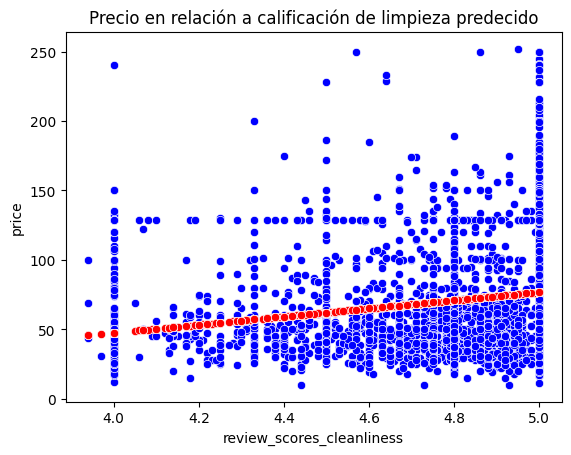

In [50]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
plt.title("Precio en relación a calificación de limpieza predecido")
sns.scatterplot(x='review_scores_cleanliness', y='price', color='blue', data=f2)
sns.scatterplot(x='review_scores_cleanliness', y='Prediccion_review_scores_cleanliness', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: title={'center': 'Capacidad en relación a cantidad de baños predecido'}, xlabel='bathrooms', ylabel='accommodates'>

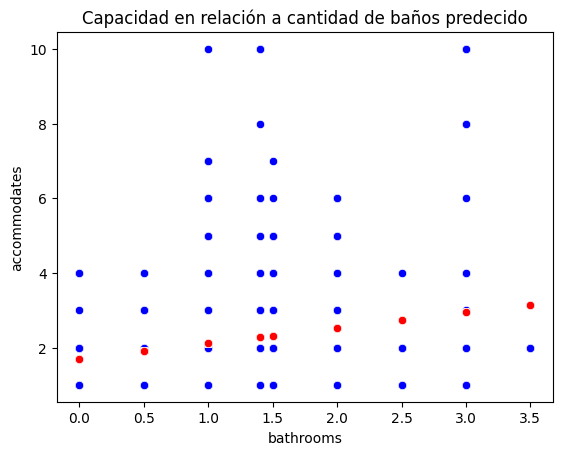

In [51]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
plt.title("Capacidad en relación a cantidad de baños predecido")
sns.scatterplot(x='bathrooms', y='accommodates', color='blue', data=f2)
sns.scatterplot(x='bathrooms', y='Prediccion_bathrooms', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

**Coeficiente de Determinacion**

In [52]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter= model.score(X=Var_Indep, y=Var_Dep)
coef_Deter

0.04329031148621276

In [53]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2= model2.score(X=Var_Indep2, y=Var_Dep)
coef_Deter2

0.0007426043734876098

In [54]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3= model3.score(X=Var_Indep3, y=Var_Dep)
coef_Deter3

0.0

In [55]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4= model4.score(X=Var_Indep4, y=Var_Dep)
coef_Deter4

0.0006638979726337757

In [56]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5= model5.score(X=Var_Indep5, y=Var_Dep)
coef_Deter5

0.005355114910524983

In [57]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6= model6.score(X=Var_Indep6, y=Var_Dep)
coef_Deter6

0.035147108651616854

In [58]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7= model7.score(X=Var_Indep7, y=Var_Dep)
coef_Deter7

0.03412747977912489

In [59]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8= model8.score(X=Var_Indep8, y=Var_Dep2)
coef_Deter8

0.029776435693536163

**Coeficientes de correlacion**

In [60]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.20806323915149635)

In [61]:
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.027250768310042375)

In [62]:
coef_Correl3=np.sqrt(coef_Deter2)
coef_Correl3

np.float64(0.027250768310042375)

In [63]:
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.025766217662547518)

In [64]:
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.07317865064706361)

In [65]:
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.18747562148614644)

In [66]:
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.184736243815676)

In [67]:
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.1725584993372861)

In [68]:
#eliminamos room_type y su prediccion 
f2= f2.drop(['room_type', 'Prediccion_room_type' ], axis=1)

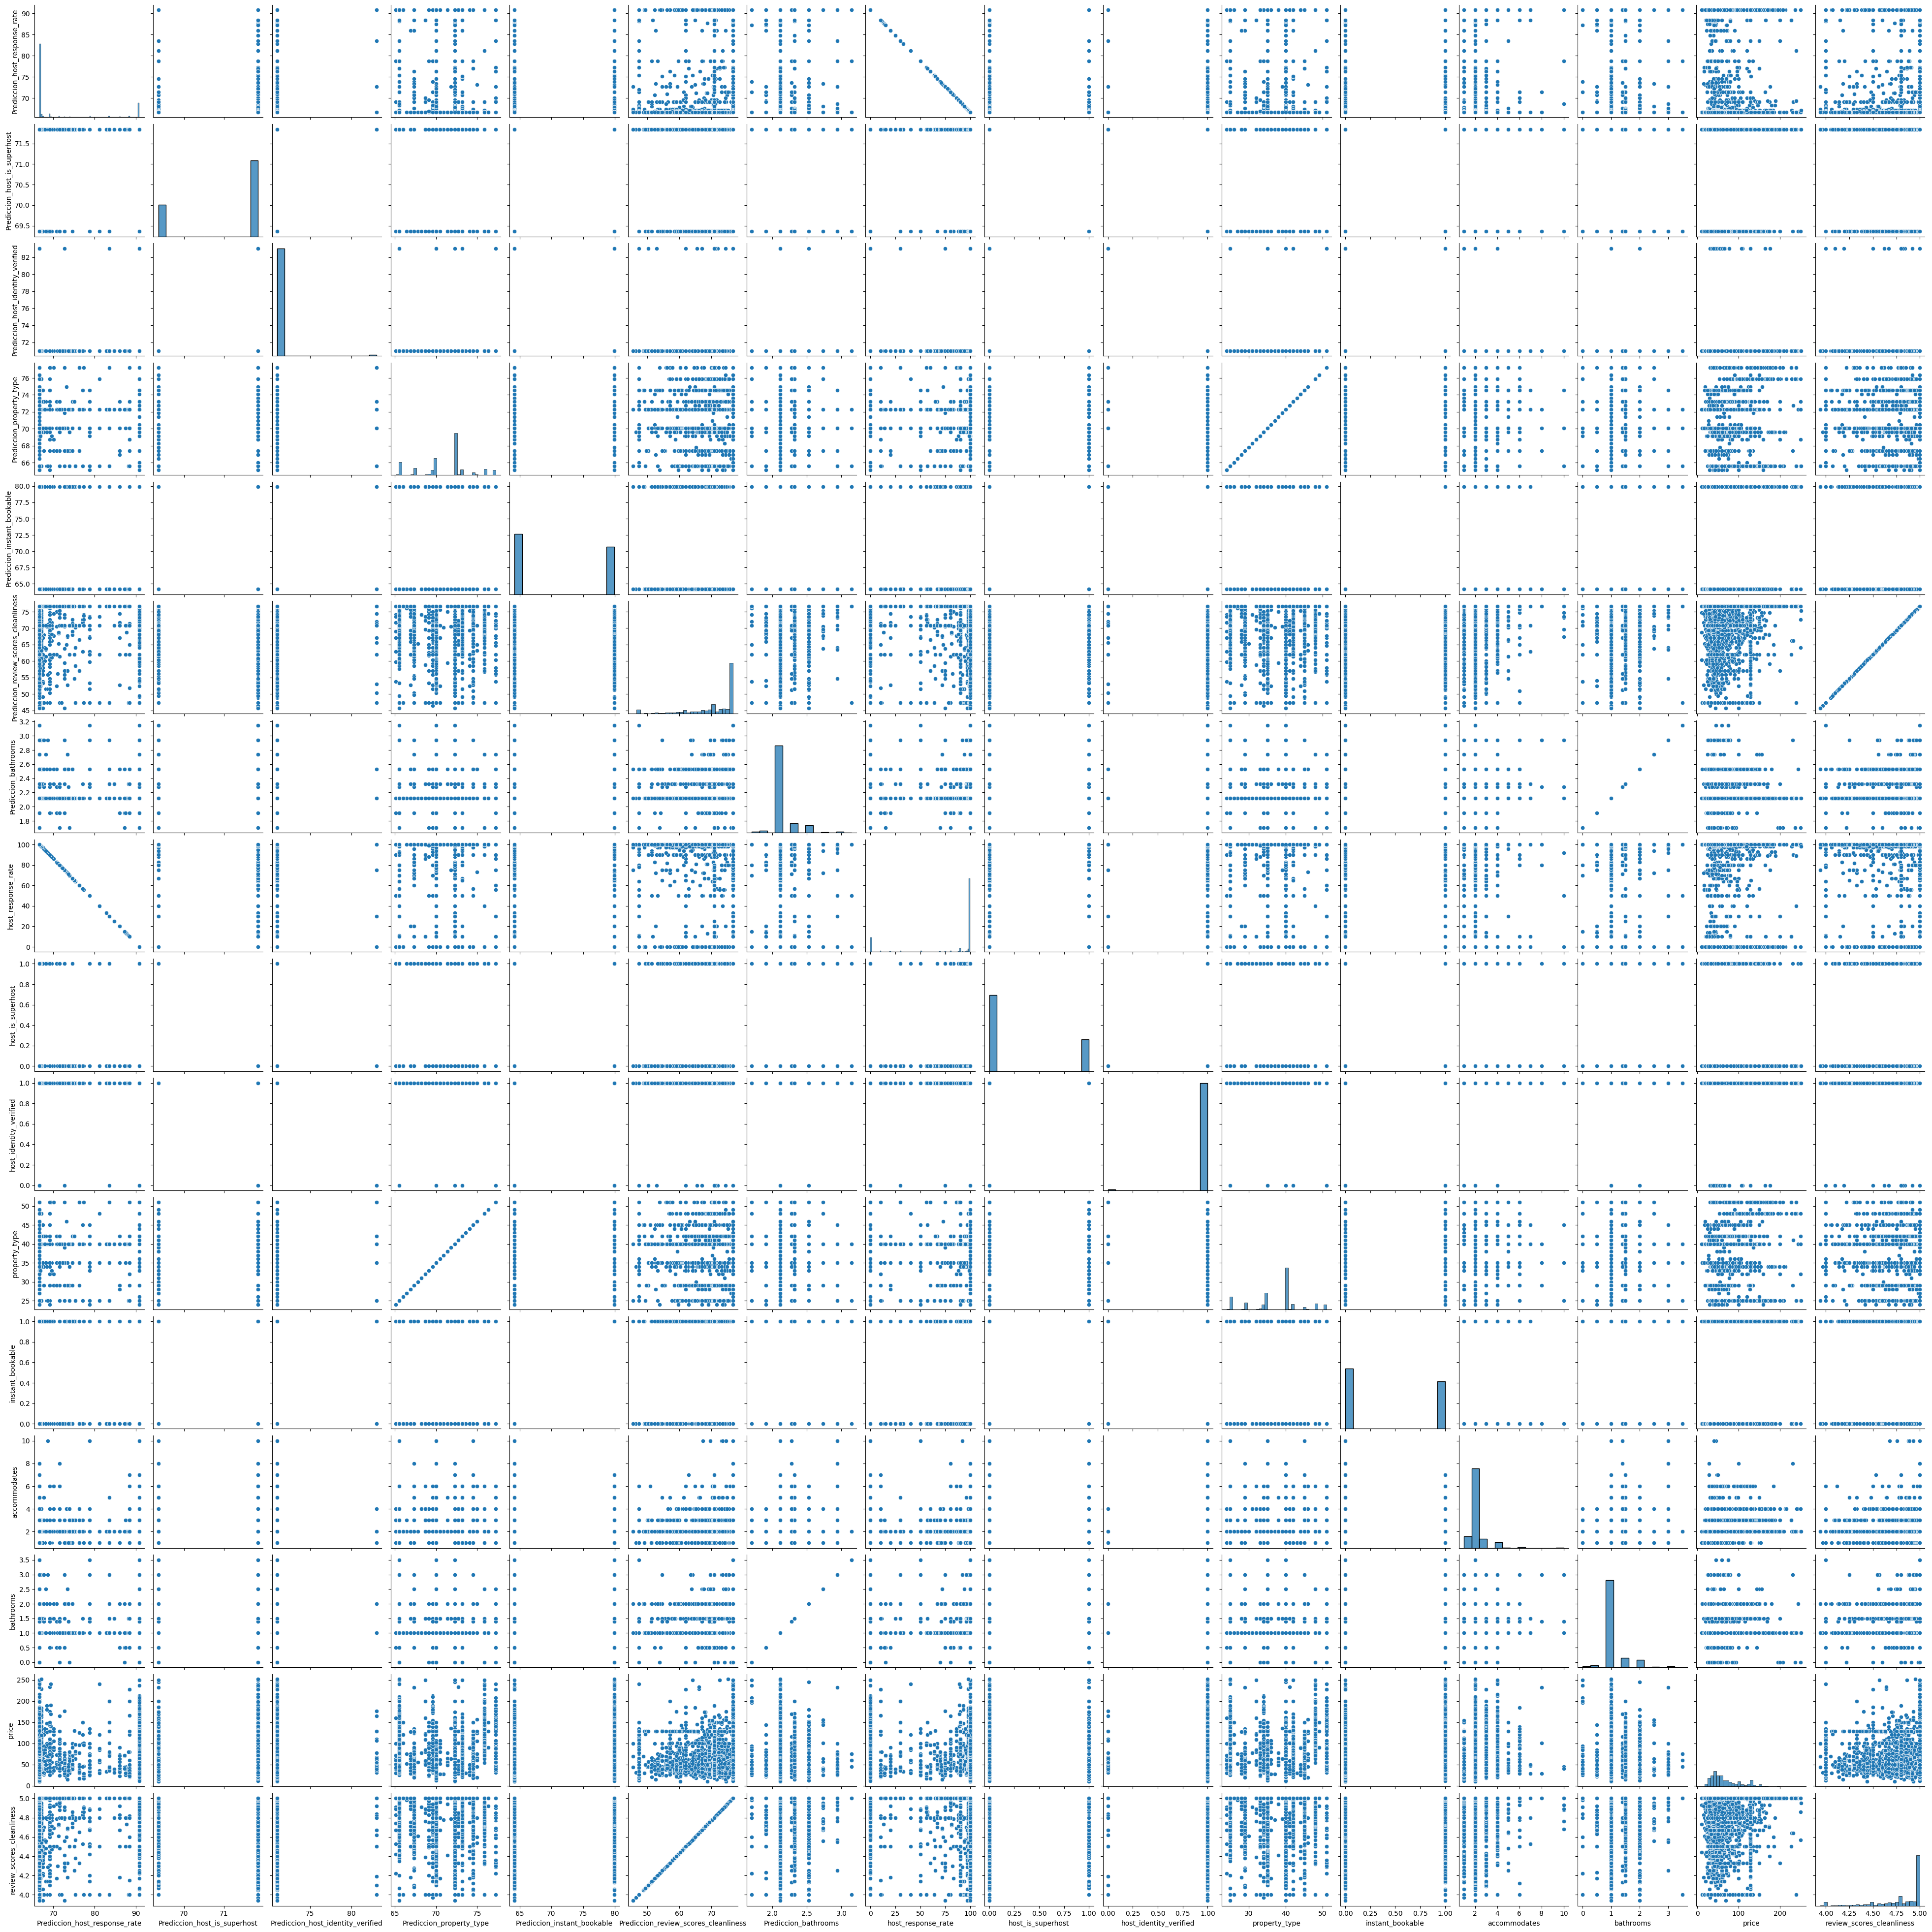

In [69]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(f2)

In [70]:
#Analizar categorias de una columna
df6 = f2.groupby(['host_response_rate'])['host_response_rate'].count()
df6

host_response_rate
0.0       440
10.0       30
11.0        3
13.0        1
14.0        4
15.0        5
20.0       15
25.0        2
30.0       32
33.0        1
40.0        8
50.0       35
56.0        9
57.0        6
60.0        9
64.0        5
65.0        3
67.0        9
70.0       22
71.0        4
72.0        6
73.0        1
75.0       18
77.0        2
78.0        2
80.0       37
81.0        3
82.0        1
83.0        5
86.0       11
88.0        6
89.0       12
90.0      115
92.0        4
93.0       10
94.0        6
95.0       14
96.0       12
97.0       29
98.0       90
99.0       23
100.0    2189
Name: host_response_rate, dtype: int64

In [71]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors= f2.corr()
Corr_Factors

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Prediccion_host_response_rate,1.000000,0.217713,0.040073,0.028905,-0.136035,0.129598,0.002213,-1.000000,-0.217713,-0.040073,0.028905,-0.136035,0.040163,0.002213,0.208063,0.129598
Prediccion_host_is_superhost,0.217713,1.000000,0.057909,0.057100,-0.050171,-0.111606,-0.043858,-0.217713,-1.000000,-0.057909,0.057100,-0.050171,0.012441,-0.043858,0.027251,-0.111606
Prediccion_host_identity_verified,0.040073,0.057909,1.000000,0.056035,0.052344,-0.001674,-0.019643,-0.040073,-0.057909,-1.000000,0.056035,0.052344,-0.024789,-0.019643,0.025766,-0.001674
Prediccion_property_type,0.028905,0.057100,0.056035,1.000000,-0.029005,-0.028790,-0.006378,-0.028905,-0.057100,-0.056035,1.000000,-0.029005,-0.020814,-0.006378,0.073179,-0.028790
Prediccion_instant_bookable,-0.136035,-0.050171,0.052344,-0.029005,1.000000,-0.019821,-0.002330,0.136035,0.050171,-0.052344,-0.029005,1.000000,0.028426,-0.002330,0.187476,-0.019821
Prediccion_review_scores_cleanliness,0.129598,-0.111606,-0.001674,-0.028790,-0.019821,1.000000,-0.016931,-0.129598,0.111606,0.001674,-0.028790,-0.019821,0.032715,-0.016931,0.184736,1.000000
Prediccion_bathrooms,0.002213,-0.043858,-0.019643,-0.006378,-0.002330,-0.016931,1.000000,-0.002213,0.043858,0.019643,-0.006378,-0.002330,0.172558,1.000000,-0.054962,-0.016931
host_response_rate,-1.000000,-0.217713,-0.040073,-0.028905,0.136035,-0.129598,-0.002213,1.000000,0.217713,0.040073,-0.028905,0.136035,-0.040163,-0.002213,-0.208063,-0.129598
host_is_superhost,-0.217713,-1.000000,-0.057909,-0.057100,0.050171,0.111606,0.043858,0.217713,1.000000,0.057909,-0.057100,0.050171,-0.012441,0.043858,-0.027251,0.111606
host_identity_verified,-0.040073,-0.057909,-1.000000,-0.056035,-0.052344,0.001674,0.019643,0.040073,0.057909,1.000000,-0.056035,-0.052344,0.024789,0.019643,-0.025766,0.001674


In [72]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Prediccion_host_response_rate,1.000000,0.217713,0.040073,0.028905,0.136035,0.129598,0.002213,1.000000,0.217713,0.040073,0.028905,0.136035,0.040163,0.002213,0.208063,0.129598
Prediccion_host_is_superhost,0.217713,1.000000,0.057909,0.057100,0.050171,0.111606,0.043858,0.217713,1.000000,0.057909,0.057100,0.050171,0.012441,0.043858,0.027251,0.111606
Prediccion_host_identity_verified,0.040073,0.057909,1.000000,0.056035,0.052344,0.001674,0.019643,0.040073,0.057909,1.000000,0.056035,0.052344,0.024789,0.019643,0.025766,0.001674
Prediccion_property_type,0.028905,0.057100,0.056035,1.000000,0.029005,0.028790,0.006378,0.028905,0.057100,0.056035,1.000000,0.029005,0.020814,0.006378,0.073179,0.028790
Prediccion_instant_bookable,0.136035,0.050171,0.052344,0.029005,1.000000,0.019821,0.002330,0.136035,0.050171,0.052344,0.029005,1.000000,0.028426,0.002330,0.187476,0.019821
Prediccion_review_scores_cleanliness,0.129598,0.111606,0.001674,0.028790,0.019821,1.000000,0.016931,0.129598,0.111606,0.001674,0.028790,0.019821,0.032715,0.016931,0.184736,1.000000
Prediccion_bathrooms,0.002213,0.043858,0.019643,0.006378,0.002330,0.016931,1.000000,0.002213,0.043858,0.019643,0.006378,0.002330,0.172558,1.000000,0.054962,0.016931
host_response_rate,1.000000,0.217713,0.040073,0.028905,0.136035,0.129598,0.002213,1.000000,0.217713,0.040073,0.028905,0.136035,0.040163,0.002213,0.208063,0.129598
host_is_superhost,0.217713,1.000000,0.057909,0.057100,0.050171,0.111606,0.043858,0.217713,1.000000,0.057909,0.057100,0.050171,0.012441,0.043858,0.027251,0.111606
host_identity_verified,0.040073,0.057909,1.000000,0.056035,0.052344,0.001674,0.019643,0.040073,0.057909,1.000000,0.056035,0.052344,0.024789,0.019643,0.025766,0.001674


<Axes: >

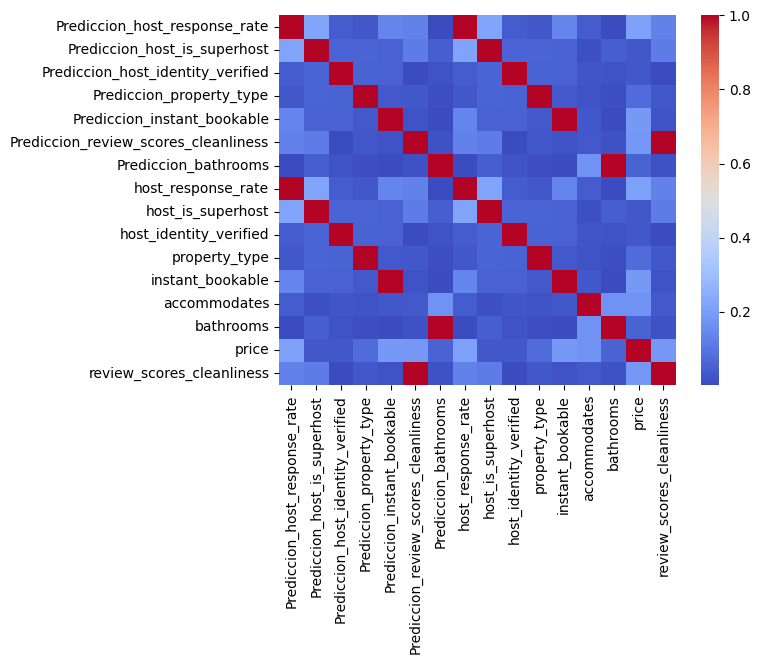

In [73]:
#Graficamos el mapa de calor de las coeficientes de correlación 
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'coolwarm')
Heart_Nap

<Axes: >

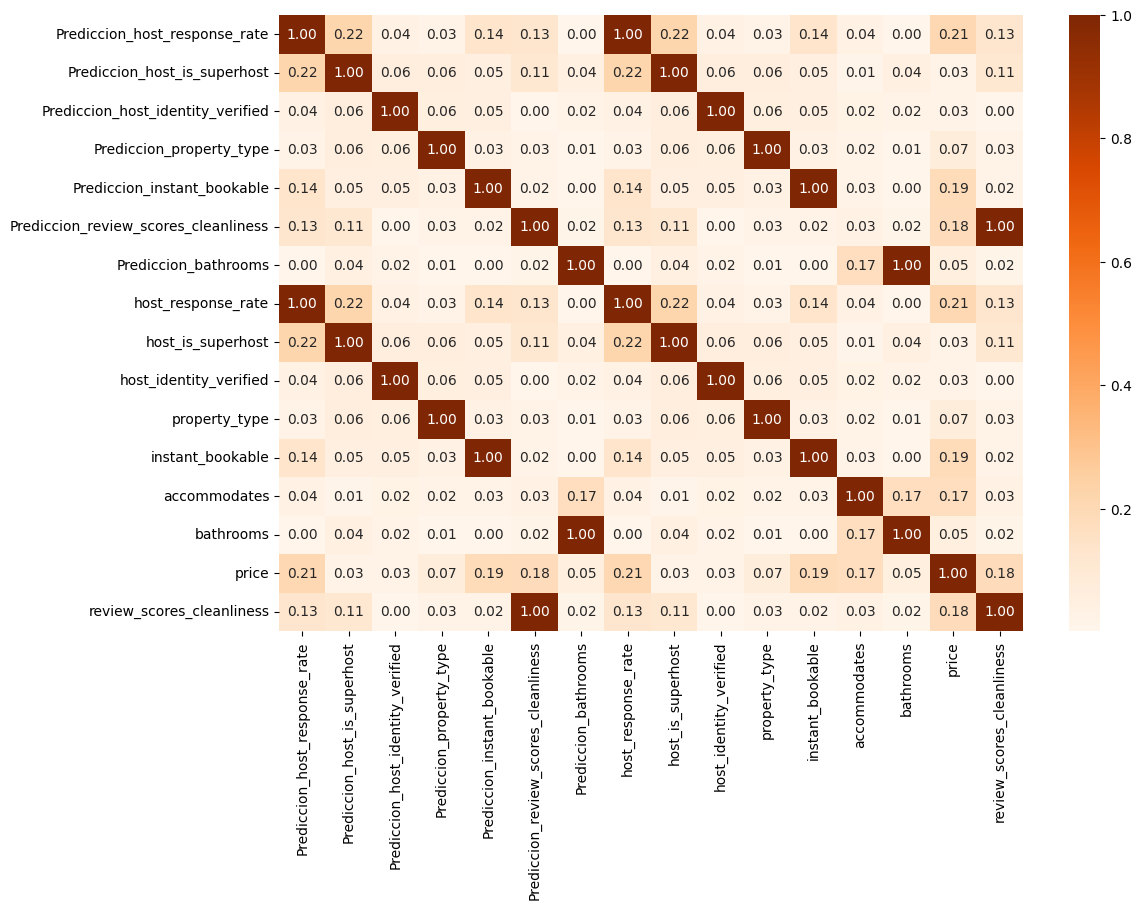

In [74]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(12,8))
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'Oranges', annot=True, fmt=".2f")
Heart_Nap

In [75]:
# Obtener R² de cada modelo
r2_1 = model.score(Var_Indep, Var_Dep)
r2_2 = model2.score(Var_Indep2, Var_Dep)
r2_3 = model3.score(Var_Indep3, Var_Dep)
r2_4 = model4.score(Var_Indep4, Var_Dep)
r2_5 = model5.score(Var_Indep5, Var_Dep)
r2_6 = model6.score(Var_Indep6, Var_Dep)
r2_7 = model7.score(Var_Indep7, Var_Dep)
r2_8 = model8.score(Var_Indep8, Var_Dep2)

# Guardar los resultados en un diccionario
r2_values = {
    "host_response_rate": r2_1,
    "host_is_superhost": r2_2,
    "room_type": r2_3,
    "host_identity_verified": r2_4,
    "property_type": r2_5,
    "instant_bookable": r2_6,
    "review_scores_cleanliness": r2_7,
    "bathrooms": r2_8
}

# Ordenar y mostrar las 3 mejores variables
top_3 = sorted(r2_values.items(), key=lambda x: x[1], reverse=True)[:3]
print("Las 3 variables con mayor correlación son:")
for variable, r2 in top_3:
    print(f"{variable}: R² = {r2:.4f}")

Las 3 variables con mayor correlación son:
host_response_rate: R² = 0.0433
instant_bookable: R² = 0.0351
review_scores_cleanliness: R² = 0.0341
